# Stock Price Prediction 

In this project we'll work for accurately predicting the future closing value of a given stock across a given period of time in the future using a dataset of past prices. <br><br> This is done in 4 stages:<ol><li>Data Gathering</li><li>Data Preprocessing<ul><li>Data Cleaning</li><li>Data Filtering</li><li>Data Transformation</li></ul></li><li>Data Visualization</li><li>Model Development</li></ol>

<h2> Data Gathering - Getting the Data </h2>

About the libraries: <br>
<b> requests: </b> Used to send request to webpage for content (API calls)<br>
<b> json: </b> A datatype - format for request and response from web. requests response is in json format<br>
<b> Pandas & numpy: </b> Libraries for Data Manipulation and handlind for data Analysis <br>

In [1]:
#Installing the libraries
#!pip install numpy
#!pip install pandas
#!pip install json
#!pip install requests

#Importing the libraries
import json
import requests
import pandas as pd
import numpy as np

We'll use https://marketstack.com/ to fetch data for getting the Data for <a href="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies">S&P 500 dataset.</a><br>
<br>
API Call to marketstack.com: http://api.marketstack.com/v1/eod<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   ? access_key = YOUR_ACCESS_KEY<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   & symbols = AAPL<br>
    
                                // optional parameters:
                                & sort = DESC
                                & date_from = YYYY-MM-DD
                                & date_to = YYYY-MM-DD
                                & limit = 100
                                & offset = 0
API Documentation: https://marketstack.com/documentation

In [2]:
#Creating the URL for API call to the website to fetch data. Arguements passed are: access_key, symbols, date_from, limit, date_to
url= "http://api.marketstack.com/v1/eod?access_key=749e4d043d47734c4cbbe588794c6bac&symbols=GOOGL&date_from=2018-01-01&date_to=2021-01-31&limit=1000"
response=requests.get(url)
json_output=response.json()
json_output

{'pagination': {'limit': 1000, 'offset': 0, 'count': 251, 'total': 251},
 'data': [{'open': 1834.02,
   'high': 1847.535,
   'low': 1801.5601,
   'close': 1827.36,
   'volume': 2226509.0,
   'adj_high': 1847.535,
   'adj_low': 1801.5601,
   'adj_close': 1827.36,
   'adj_open': 1834.02,
   'adj_volume': 2226509.0,
   'symbol': 'GOOGL',
   'exchange': 'XNAS',
   'date': '2021-01-29T00:00:00+0000'},
  {'open': 1831.0,
   'high': 1887.99,
   'low': 1831.0,
   'close': 1853.2,
   'volume': 2763905.0,
   'adj_high': 1887.99,
   'adj_low': 1831.0,
   'adj_close': 1853.2,
   'adj_open': 1831.0,
   'adj_volume': 2763905.0,
   'symbol': 'GOOGL',
   'exchange': 'XNAS',
   'date': '2021-01-28T00:00:00+0000'},
  {'open': 1874.91,
   'high': 1880.47,
   'low': 1797.28,
   'close': 1818.94,
   'volume': 4125631.0,
   'adj_high': 1880.47,
   'adj_low': 1797.28,
   'adj_close': 1818.94,
   'adj_open': 1874.91,
   'adj_volume': 4125631.0,
   'symbol': 'GOOGL',
   'exchange': 'XNAS',
   'date': '2021-01-

In [3]:
#Creating a DataFrame for better understanding and handling of data
df=pd.DataFrame(json_output['data'])
df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
0,1834.02,1847.535,1801.5601,1827.36,2226509.0,1847.535,1801.5601,1827.36,1834.02,2226509.0,GOOGL,XNAS,2021-01-29T00:00:00+0000
1,1831.00,1887.990,1831.0000,1853.20,2763905.0,1887.990,1831.0000,1853.20,1831.00,2763905.0,GOOGL,XNAS,2021-01-28T00:00:00+0000
2,1874.91,1880.470,1797.2800,1818.94,4125631.0,1880.470,1797.2800,1818.94,1874.91,4125631.0,GOOGL,XNAS,2021-01-27T00:00:00+0000
3,1885.99,1915.750,1876.1300,1907.95,1573078.0,1915.750,1876.1300,1907.95,1885.99,1573078.0,GOOGL,XNAS,2021-01-26T00:00:00+0000
4,1912.74,1921.820,1859.1600,1894.28,2529346.0,1921.820,1859.1600,1894.28,1912.74,2529346.0,GOOGL,XNAS,2021-01-25T00:00:00+0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1467.38,1485.240,1465.4100,1479.11,1418049.0,1485.240,1465.4100,1479.11,1467.38,1418049.0,GOOGL,XNAS,2020-02-07T00:00:00+0000
247,1451.98,1481.560,1450.4800,1475.97,1891079.0,1481.560,1450.4800,1475.97,1451.98,1891079.0,GOOGL,XNAS,2020-02-06T00:00:00+0000
248,1463.61,1464.580,1429.6700,1446.05,1818793.0,1464.580,1429.6700,1446.05,1463.61,1818793.0,GOOGL,XNAS,2020-02-05T00:00:00+0000
249,1454.49,1467.340,1422.0300,1445.41,4793967.0,1467.340,1422.0300,1445.41,1454.49,4793967.0,GOOGL,XNAS,2020-02-04T00:00:00+0000


<h5> Checkpoint - We have completed Data Gathering</h5>

## Data Reduction -or- Data Filtering

We Remove all the unnecessary columns from the data. Since we only care about the opening and closing daily price,and volume traded of stock, So we remove all the other columns.

In [4]:
col_names = ['open','close','volume']
df=df[col_names]
df.head()

,open,close,volume
0,1834.02,1827.36,2226509.0
1,1831.00,1853.20,2763905.0
2,1874.91,1818.94,4125631.0
3,1885.99,1907.95,1573078.0
4,1912.74,1894.28,2529346.0


In [5]:
df=df.reindex(index=df.index[::-1])
df.head()

,open,close,volume
250,1461.65,1482.60,3608760.0
249,1454.49,1445.41,4793967.0
248,1463.61,1446.05,1818793.0
247,1451.98,1475.97,1891079.0
246,1467.38,1479.11,1418049.0


In [6]:
df.reset_index(inplace=True)
df.head()

,index,open,close,volume
0,250,1461.65,1482.60,3608760.0
1,249,1454.49,1445.41,4793967.0
2,248,1463.61,1446.05,1818793.0
3,247,1451.98,1475.97,1891079.0
4,246,1467.38,1479.11,1418049.0


In [7]:
df=df.drop('index',axis=1)
df['day']=df.index
df=df[['day','open','close','volume']]
df.head()

,day,open,close,volume
0,0,1461.65,1482.60,3608760.0
1,1,1454.49,1445.41,4793967.0
2,2,1463.61,1446.05,1818793.0
3,3,1451.98,1475.97,1891079.0
4,4,1467.38,1479.11,1418049.0


## Data Cleaning 

To fit the model one needs to get rid of all the null values. Hence we need to identify all columns will null or NaN or None values. <br>
NaN stands for Not a Number

In [8]:
df.isna().sum()

day       0
open      0
close     0
volume    0
dtype: int64

As we observe there are no Null values hence we do not need to handle null values. If there were null values we could have used df.fillna(df.mean()) to replace all missing values with mean values or df.dropna() to remove all missing values

In [9]:
#df.dropna()
#df.fillna(df.mean())

<h3> Data Visualization </h3>

We plot Closing price of stock with days using matplotlib library in pandas

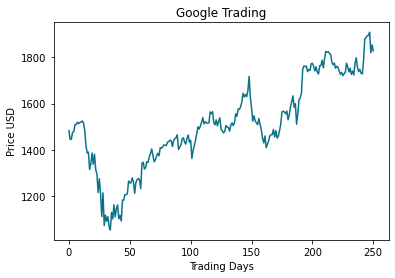

In [10]:
import matplotlib.pyplot as plt

def plot_basic(stocks, title='Google Trading', y_label='Price USD', x_label='Trading Days'):
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    ax.plot(stocks.index, stocks['close'], '#0A7388')

    # Add title and labels
    ax.set_title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()
    
plot_basic(df)

In [11]:
#Cheching stats of the dataframe
df.describe()

,day,open,close,volume
count,251.000000,251.000000,251.000000,2.510000e+02
mean,125.000000,1505.428605,1506.890956,2.036851e+06
std,72.601653,195.006387,195.079410,9.203277e+05
min,0.000000,1056.370000,1054.130000,4.656380e+05
25%,62.500000,1401.340000,1405.170000,1.432750e+06
50%,125.000000,1497.050000,1504.630000,1.742275e+06
75%,187.500000,1645.090000,1641.780000,2.477056e+06
max,250.000000,1912.740000,1907.950000,5.417888e+06


## Data Normalization 

Data Normalization is important to get meaningful predictions. If this isn't done the data with larger value may supress the smaller data. <br><br>Min-Max Normalization id performed as:<br>
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))<br>
X_scaled = X_std * (max - min) + min<br><br>
We're using sklean's MinMaxScaler for the Normalization purpose

In [12]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#numerical = ['open', 'close', 'volume']
#df[numerical] = scaler.fit_transform(df[numerical])

#df.head()

## DataFrame Description

In [13]:
#Getting Details about the columns of dataframe, such as their data type, Non null values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     251 non-null    int64  
 1   open    251 non-null    float64
 2   close   251 non-null    float64
 3   volume  251 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


Now we have our dataframe ready! Lets move to data modeling

# Data Visualization

For Data Visulaization we are going to use seaborn. This is a visualization library for python for easy plotting

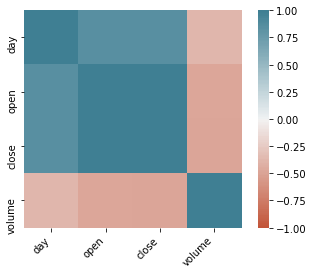

In [14]:
import seaborn as sns

ax = sns.heatmap(
    df.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Great! Green means positive, red means negative. The stronger the color, the larger the correlation magnitude. The heatmap allows us to oberve which columns have a strong relation between them.<br>
Here we observe day and volume have a good relationship, but day and close and open have a weak relationship

Next, we plot scatter plot day vs all the other columns to observe their relationship

<AxesSubplot:xlabel='day', ylabel='volume'>

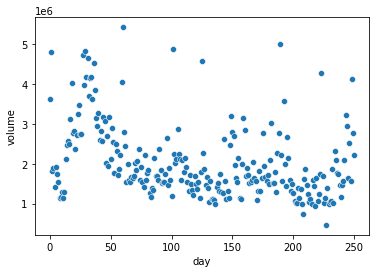

In [15]:
sns.scatterplot(x=df['day'],y=df['volume'])

<AxesSubplot:xlabel='day', ylabel='close'>

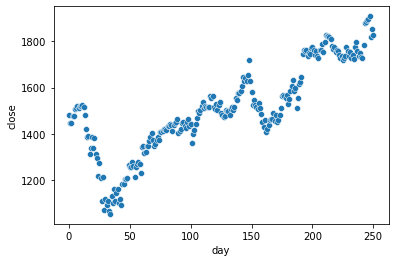

In [16]:
sns.scatterplot(x=df['day'],y=df['close'])

<AxesSubplot:xlabel='day', ylabel='open'>

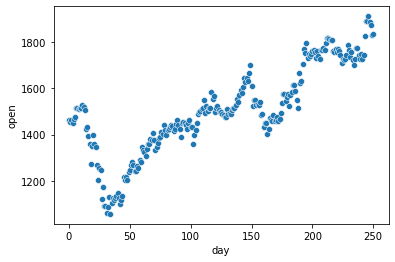

In [17]:
sns.scatterplot(x=df['day'],y=df['open'])

More scatterplot documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

# Model Development - Polynomial Regression

We split our dataset in train and test set for developing our model

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= X_train, X_test, y_train, y_test = train_test_split(df['day'], df['close'], test_size=0.2, random_state=5)

In [19]:
print("X_train shape:",X_train.shape)
print("This is treated as a 1D array and not as a 2D array! Hence raises error in further steps. So we convert it to a 2D array by making each element a list itself\n")

X_train=np.array([[i] for i in X_train])
y_train=np.array([[i] for i in y_train])
X_test=np.array([[i] for i in X_test])
y_test=np.array([[i] for i in y_test])

print("X_train shape:",X_train.shape) 
print("Y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",y_test.shape)

X_train shape: (200,)
This is treated as a 1D array and not as a 2D array! Hence raises error in further steps. So we convert it to a 2D array by making each element a list itself

X_train shape: (200, 1)
Y_train shape: (200, 1)
X_test shape: (51, 1)
Y_test shape: (51, 1)


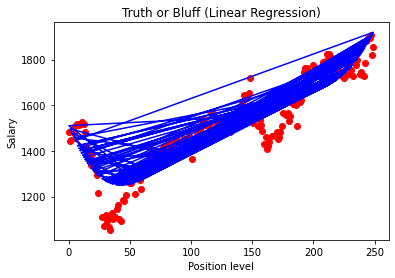

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)    #Defining a plonomial of degree 4
X_poly = poly_reg.fit_transform(X_train)   #Fitting our Data to the polynomial
pol_reg = LinearRegression()               
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [21]:
y_pred=pol_reg.predict(poly_reg.fit_transform(X_test))

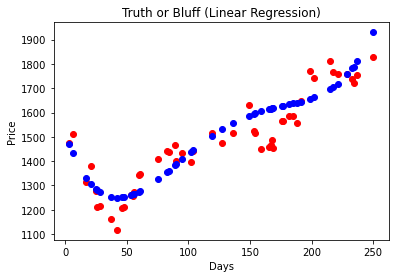

In [22]:
def viz_polymonial():
    plt.scatter(X_test, y_test, color='red')
    plt.scatter(X_test, y_pred, color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()
    return
viz_polymonial()

In [23]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 63.45
Mean squared error = 5874.24
Median absolute error = 64.34
Explain variance score = 0.84
R2 score = 0.83


Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.